<a href="https://colab.research.google.com/github/bipinKrishnan/ML_from_scratch/blob/master/KNN_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

# Visualizing Data

In [2]:
data = load_iris()

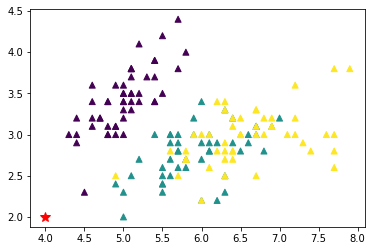

In [3]:
plt.scatter(data.data[:, 0], data.data[:, 1], marker='^', c=data.target)
plt.plot(4, 2, 'r*', markersize=10)
plt.show()

# KNN classifier

In [4]:
import torch

In [43]:
class KNN():
  def __init__(self, n_neighbors=3):
    self.n_neighbors = n_neighbors

  def euclidean_dist(self, x1, x2):
    return -(torch.mean(torch.sqrt((x1 - x2)**2), dim=1))

  def fit(self, train_x, train_y):
    self.data_x = train_x
    self.data_y = train_y
  
  def top_neighbors(self, X, y, test_x):
    out = []

    for i in range(test_x.size(0)):
      dist = self.euclidean_dist(self.data_x.data, test_x[i])
      neighbor = ((self.data_y[dist.topk(self.n_neighbors, dim=0).indices]).sum())/float(self.n_neighbors)

      out.append(neighbor.round())

    return torch.tensor(out, dtype=torch.int32)

  def predict(self, test_x):
    return self.top_neighbors(self.data_x, self.data_y, test_x)

  def score(self, test_x, test_y):
    correct = 0
    correct += (self.predict(test_x)) == test_y

    return float(correct.sum().item())/len(test_x)

# Comparing Results

## Comparison on iris dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42, shuffle=True, stratify=data.target)

In [38]:
x_train.shape, y_train.shape

((112, 4), (112,))

In [39]:
#inputs for pytorch model
X = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)
X_ = torch.from_numpy(x_test)
y_ = torch.from_numpy(y_test)

Our Model

In [46]:
%time
knn_p = KNN(4)
knn_p.fit(X, y)
knn_p.predict(X_)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.53 µs


tensor([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 1,
        2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1], dtype=torch.int32)

Sklearn's Model

In [47]:
%time
#sklearn's model
knn_s = KNeighborsClassifier(4)
knn_s.fit(x_train, y_train)
knn_s.predict(x_test)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.44 µs


array([0, 1, 1, 1, 0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 1])

In [49]:
%time
knn_s.score(x_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


0.9736842105263158

In [53]:
%time
knn_p.score(X_, y_)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs


0.9736842105263158

In [54]:
print("Sklearn's score: ", knn_s.score(x_test, y_test))
print("Our model's score: ", knn_p.score(X_, y_))

Sklearn's score:  0.9736842105263158
Our model's score:  0.9736842105263158


## Comparison on breast cancer dataset

In [55]:
from sklearn.datasets import load_breast_cancer

In [56]:
data = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42, shuffle=True, stratify=data.target)

In [57]:
#inputs for pytorch model
X = torch.from_numpy(x_train)
y = torch.from_numpy(y_train)
X_ = torch.from_numpy(x_test)
y_ = torch.from_numpy(y_test)

Our Model

In [69]:
%time
knn_p = KNN(3)
knn_p.fit(X, y)
knn_p.predict(X_)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs


tensor([1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1],
       dtype=torch.int32)

Sklearn's Model

In [72]:
%time
#sklearn's model
knn_s = KNeighborsClassifier(3)
knn_s.fit(x_train, y_train)
knn_s.predict(x_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


array([1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [75]:
%time
knn_p.score(X_, y_)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


0.9440559440559441

In [76]:
%time
knn_s.score(x_test, y_test)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


0.9300699300699301

In [77]:
print("Sklearn's score: ", knn_s.score(x_test, y_test))
print("Our model's score: ", knn_p.score(X_, y_))

Sklearn's score:  0.9300699300699301
Our model's score:  0.9440559440559441
